In [1]:
# KaggleX Cohert 4 Skill Assessment Challenge

## Import Library

In [2]:
!pip install --upgrade pip
!pip install category_encoders xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2


In [3]:
# Import libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils.validation import check_is_fitted
from sklearn.exceptions import NotFittedError
import category_encoders
from category_encoders.cat_boost import CatBoostEncoder

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns
import copy

## Download Dataset

In [4]:
# Dataset paths
train_path = "/kaggle/input/kagglex-car-price-prediction-dataset/train.csv"
test_path = "/kaggle/input/kagglex-car-price-prediction-dataset/test.csv"

df = pd.read_csv(train_path)
unedited_df = copy.deepcopy(df)

test_df = pd.read_csv(test_path)
unedited_test_df = copy.deepcopy(test_df)

## Check data

In [5]:
df.shape

(54273, 13)

In [6]:
test_df.shape

(36183, 12)

In [7]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [8]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [9]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [12]:
df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [13]:
df.describe()

,id,model_year,milage,price
count,54273.000000,54273.000000,54273.000000,5.427300e+04
mean,27136.000000,2015.091979,72746.175667,3.921844e+04
std,15667.409917,5.588909,50469.490448,7.282634e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,13568.000000,2012.000000,32268.000000,1.550000e+04
50%,27136.000000,2016.000000,66107.000000,2.800000e+04
75%,40704.000000,2019.000000,102000.000000,4.500000e+04
max,54272.000000,2024.000000,405000.000000,2.954083e+06


### Based on the data
- #### Too many models and engine
- #### Engine could probably be broken down into more features

## Exploratory Data Analysis (EDA)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [15]:
categorical_features = [
    "brand",
    "model",
    "fuel_type",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
    "accident",
    "clean_title",
]

numerical_features = [
    "milage",
    "model_year",
#     "horsepower",
#     "accident",
#     "num_cylinders",
#     "displacement"
]

print(f"Number of Columns: {len(df.columns)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"Number of Numerical Features: {len(numerical_features)}")

Number of Columns: 13
Number of Categorical Features: 9
Number of Numerical Features: 2


### The 2 columns not used as features are:
- #### id
- #### price, which will be the label

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


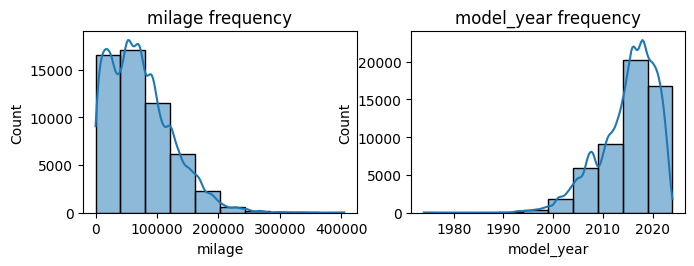

In [16]:
plt.figure(figsize=(12, 8))
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, index)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(f"{feature} frequency")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

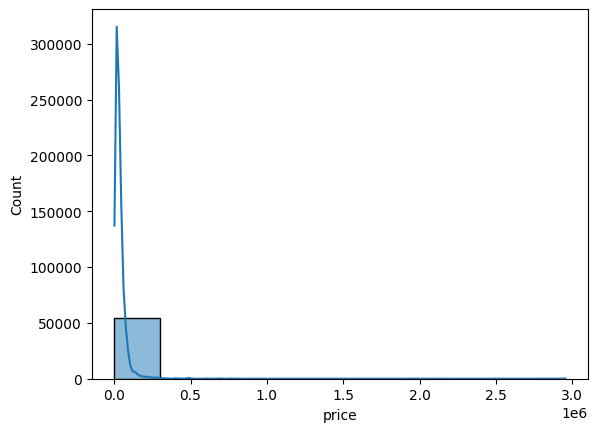

In [17]:
# Plot price
sns.histplot(data=df["price"], bins=10, kde=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


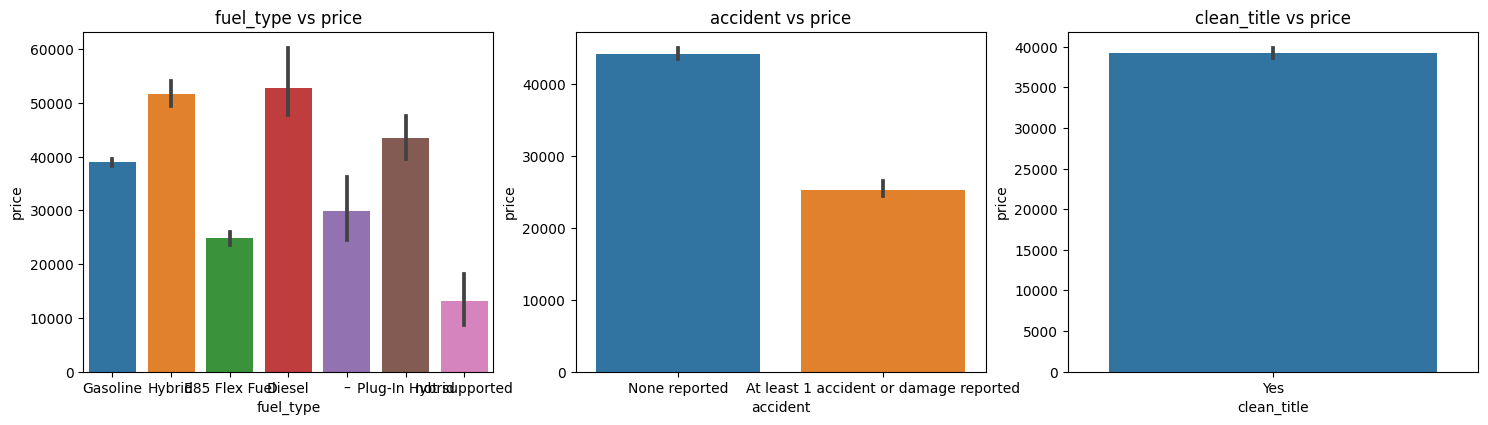

In [19]:
categorical_few_uniques_features = [
    "fuel_type", 
    "accident", 
    "clean_title"
#     "ext_col",
#     "int_col",
#     "engine_shape",
#     "transmission"
]


plt.figure(figsize=(18, 15))
for index, feature in enumerate(categorical_few_uniques_features, start=1):
    plt.subplot(3, 3, index)
    sns.barplot(data=df, x=feature, y="price")
    plt.title(f"{feature} vs price")
plt.show()

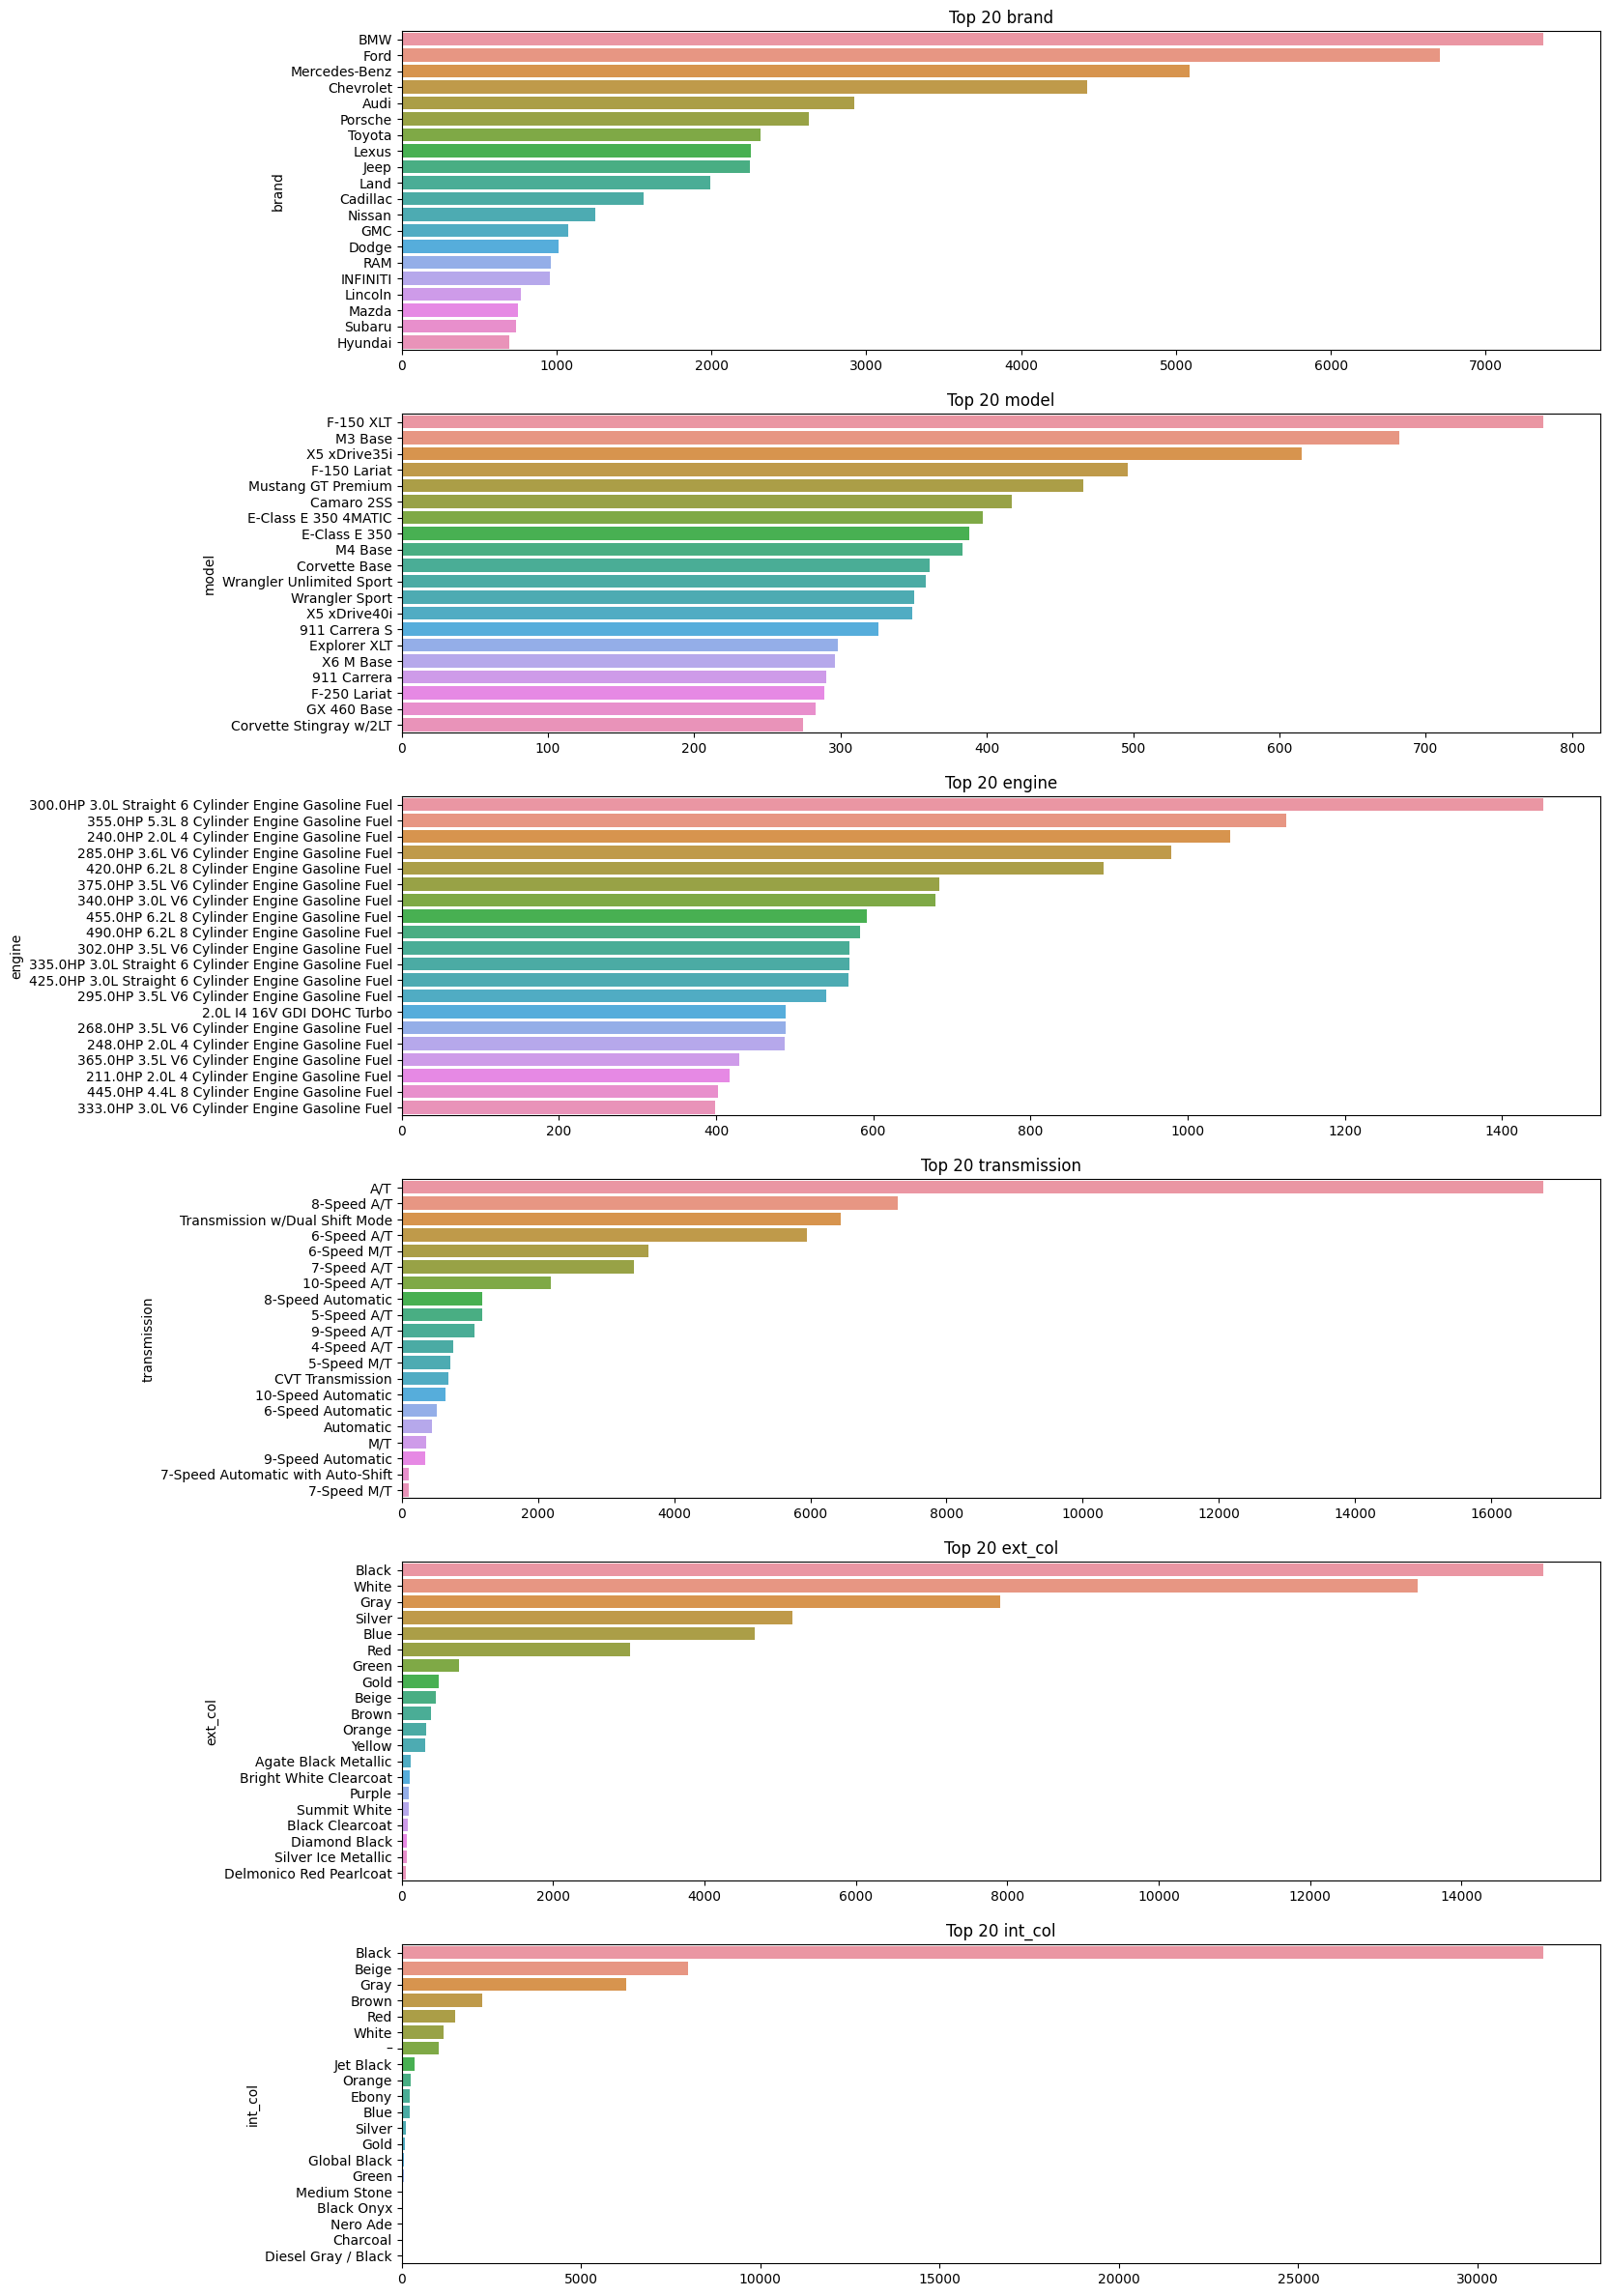

In [20]:
categorical_many_unique_features = [
    "brand",
    "model",
    "engine",
    "transmission",
    "ext_col",
    "int_col",
]

plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    common_features = df[feature].value_counts().head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=common_features.values, y=common_features.index)
    plt.title(f"Top 20 {feature}")

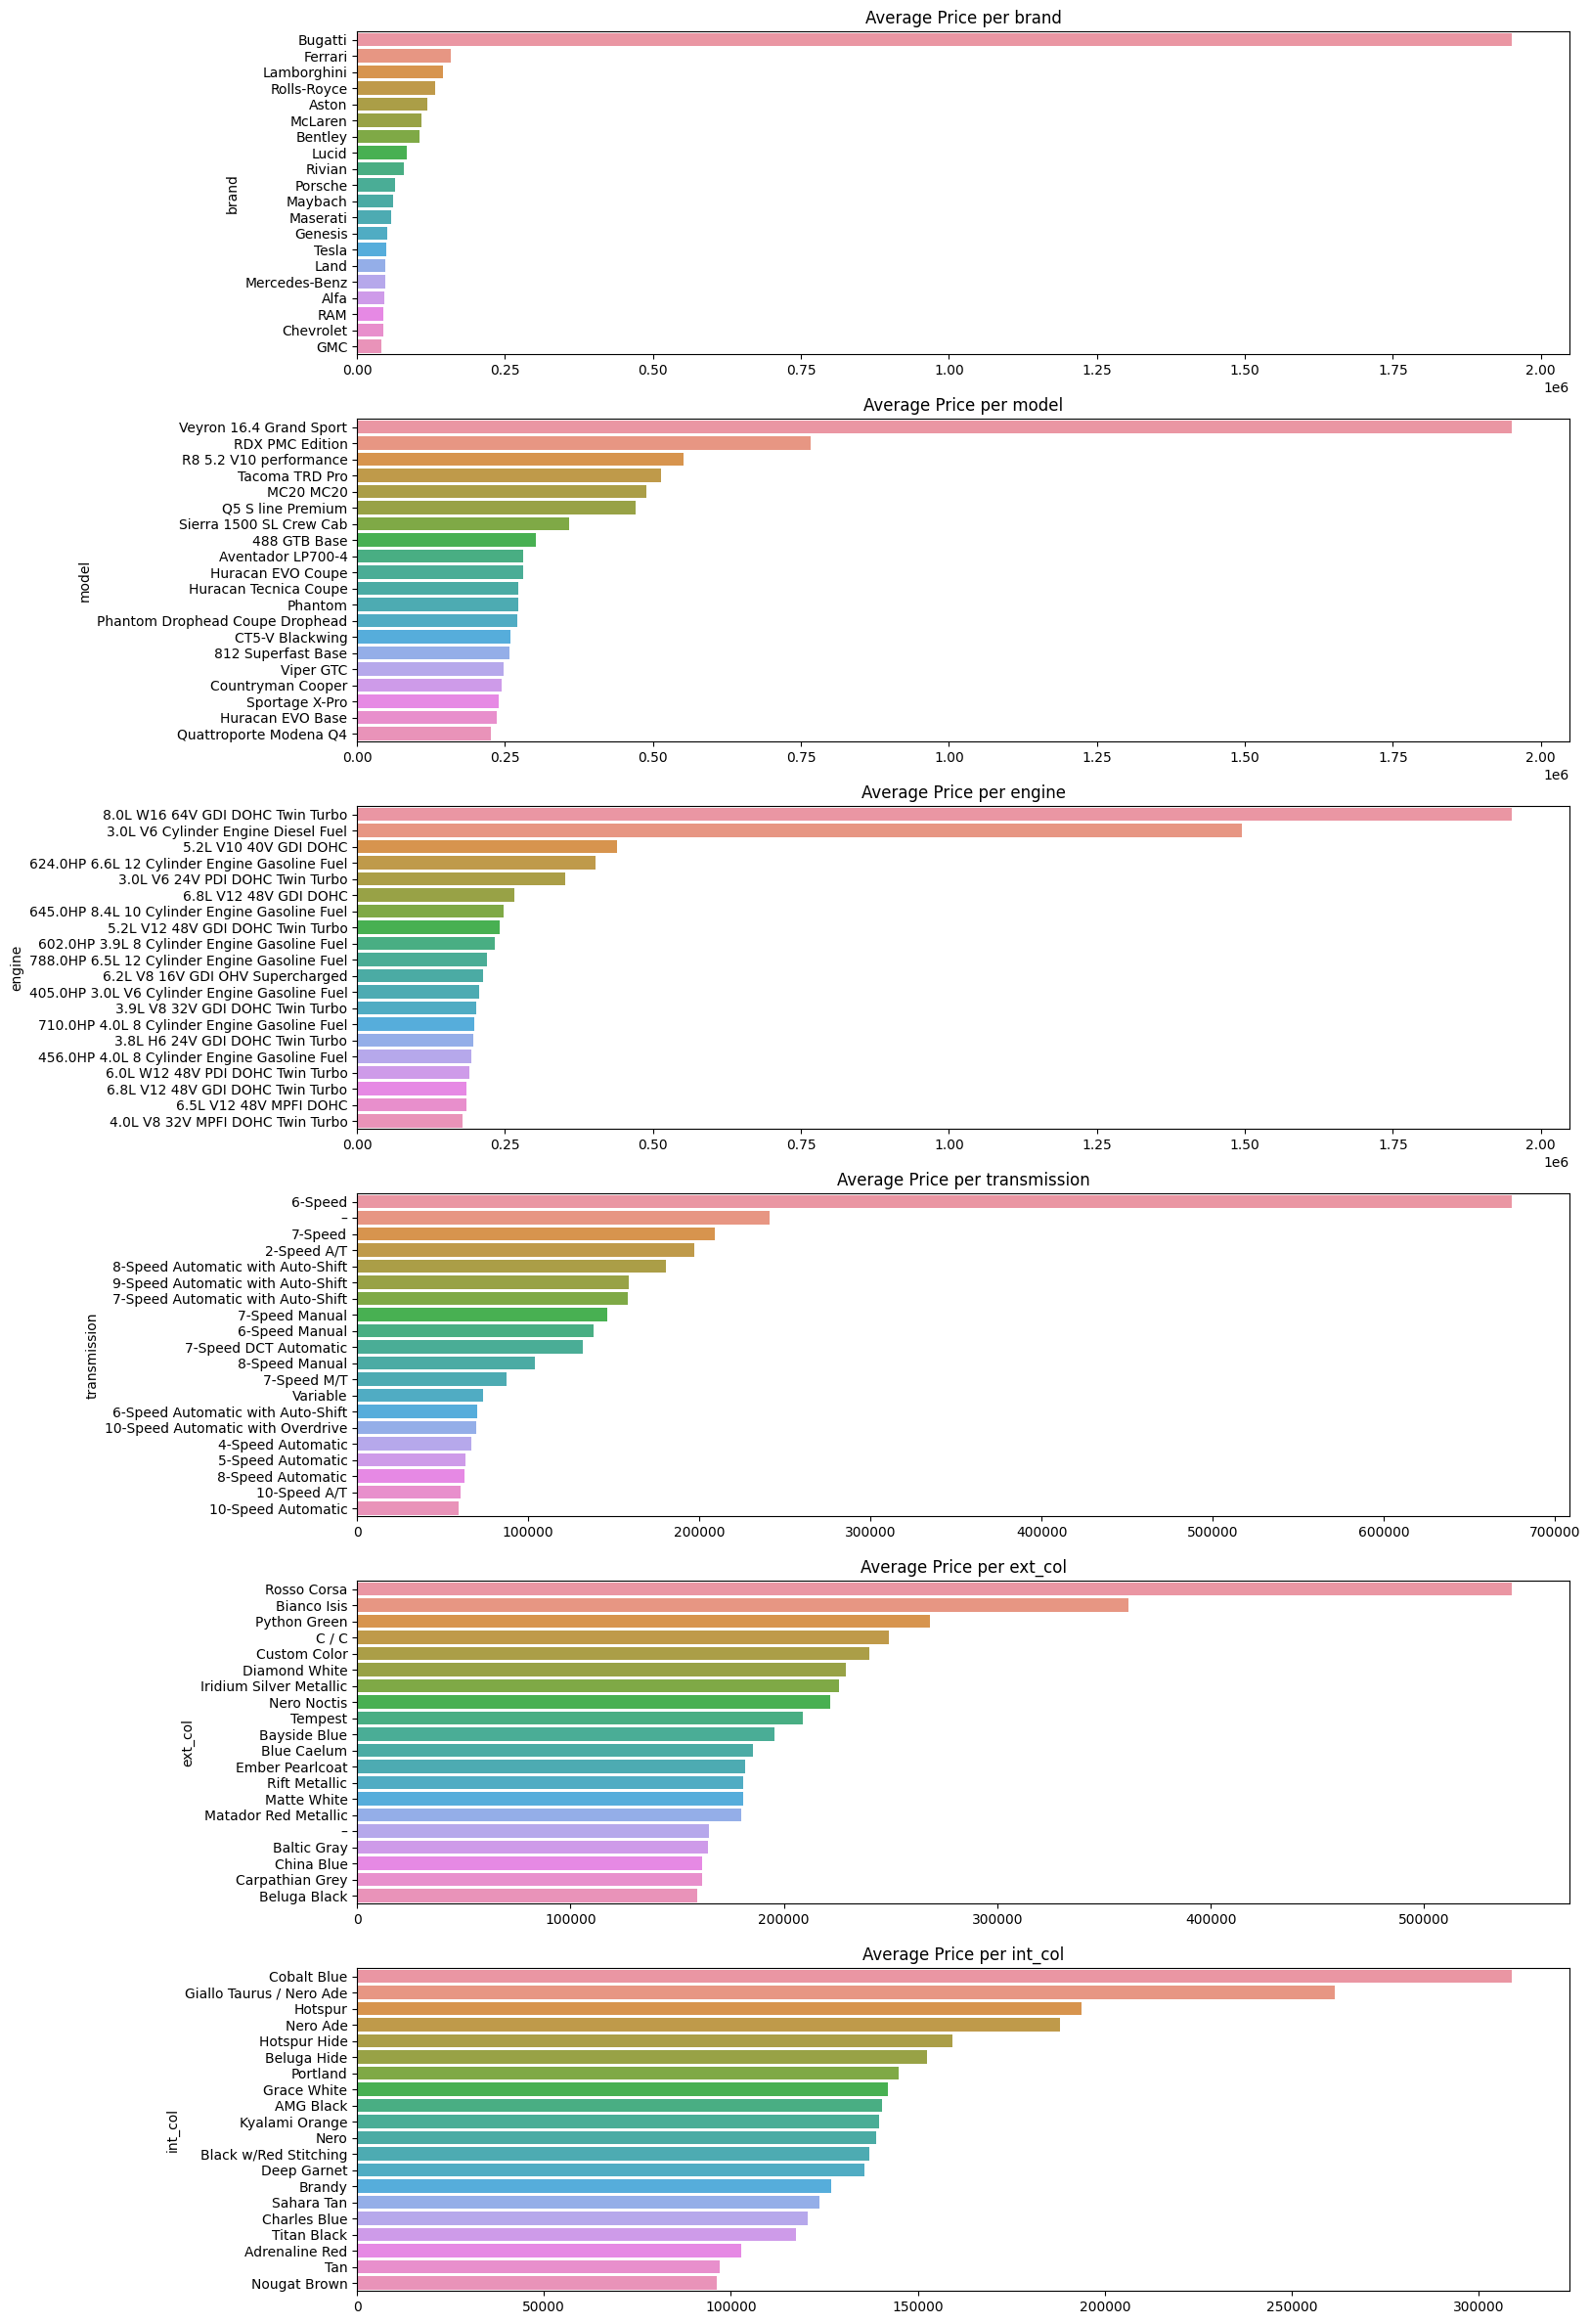

In [21]:
plt.figure(figsize=(16, 30))
for index, feature in enumerate(categorical_many_unique_features, start=1):
    feature_mean = df.groupby(feature)["price"].mean().sort_values(ascending=False).head(20)
    plt.subplot(6, 1, index)
    sns.barplot(x=feature_mean.values, y=feature_mean.index)
    plt.title(f"Average Price per {feature}")

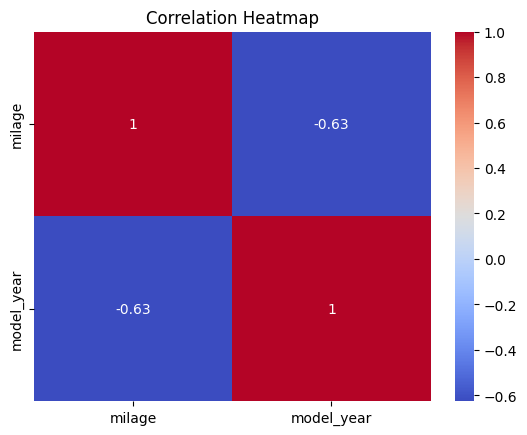

In [22]:
# Plot heatmap
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# For testing
# df.groupby("model")["price"].mean().sort_values(ascending=False)
df["engine"].value_counts().head(50)
print(df.groupby("model")["price"].mean().sort_values(ascending=False))

df.groupby("model")["price"].mean().mean()

model
Veyron 16.4 Grand Sport    1.950995e+06
RDX PMC Edition            7.658155e+05
R8 5.2 V10 performance     5.511535e+05
Tacoma TRD Pro             5.139372e+05
MC20 MC20                  4.890000e+05
                               ...     
allroad 2.7T               5.833333e+03
RSX Base                   5.400000e+03
Vue Hybrid Base            4.370000e+03
S-10 LS                    4.200000e+03
Prowler Base               3.850000e+03
Name: price, Length: 1827, dtype: float64


42302.752114994466

## Data Preprocessing

### Simplifying model feature

In [24]:
# Simplify model feature by only getting the first word
prev_num_of_unique = unedited_df["model"].nunique()

df["model"] = df["model"].apply(lambda x: x.split(" ")[0])
test_df["model"] = df["model"].apply(lambda x: x.split(" ")[0])


print(prev_num_of_unique)
df["model"].nunique()

1827


502

### Cleaning Fuel Type

#### Gasoline is closest to mean, so we replace nulls (–) with Gasoline

In [25]:
def clean_fuel_type(text):
    """ Clean fuel type feature using keywords """
    words = text.split()
    for word in words:
        word = word.lower()
        if word == "–" or word == "not":
            return "tmp"
        
        if word == "hybrid":
            return "Hybrid"
        
    return text

In [26]:
# Ensure fuel type is not yet edited
df["fuel_type"] = unedited_df["fuel_type"]
test_df["fuel_type"] = unedited_test_df["fuel_type"]

# Clean fuel types
df["fuel_type"] = df["fuel_type"].apply(clean_fuel_type)
test_df["fuel_type"] = test_df["fuel_type"].apply(clean_fuel_type)

In [27]:
# Get the most common fuel type to be used for no/invalid fuel type shape
with_fuel_type = df["fuel_type"].value_counts().sort_values(ascending=False)
fuel_types = with_fuel_type.index
common_fuel_type = fuel_types[0]
common_fuel_type

'Gasoline'

In [28]:
# Replace no/invalid fuel type to the most common fuel type
df.loc[df["fuel_type"] == "tmp","fuel_type"] = common_fuel_type
test_df.loc[test_df["fuel_type"] == "tmp","fuel_type"] = common_fuel_type

In [29]:
print(unedited_df[["fuel_type"]].head())
print(df[["fuel_type"]].head())

  fuel_type
0  Gasoline
1  Gasoline
2  Gasoline
3    Hybrid
4  Gasoline
  fuel_type
0  Gasoline
1  Gasoline
2  Gasoline
3    Hybrid
4  Gasoline


### Extract horsepower

In [30]:
def extract_horsepower(text):
    """ Extract horsepower using the HP keyword """
    words = text.split()
    for word in words:
        if word[-2:] == "HP":
            return int(float(word[:-2]))
    return "tmp"

In [31]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["horsepower"] = df["engine"].apply(extract_horsepower)
test_df["horsepower"] = test_df["engine"].apply(extract_horsepower)

In [32]:
# Get the mean from the valid horsepowers to be used for no/invalid horsepower
with_horsepower = df.loc[df["horsepower"] != 'tmp', 'horsepower']
horsepower_ave = round(with_horsepower.mean())

print(horsepower_ave)

332


In [33]:
# Replace no/invalid horsepower to the average horsepower
df.loc[df["horsepower"] == "tmp","horsepower"] = horsepower_ave
test_df.loc[test_df["horsepower"] == "tmp","horsepower"] = horsepower_ave

In [34]:
# Convert the horsepower column/feature to int
df["horsepower"] = df["horsepower"].apply(pd.to_numeric)
test_df["horsepower"] = test_df["horsepower"].apply(pd.to_numeric)

In [35]:
# print(unedited_df["engine"].head())
# df["horsepower"].head()
df[["engine", "horsepower"]].head()

,engine,horsepower
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,375
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,300
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,300
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,335
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,200


### Extract displacement (Liters denoted as L)

In [36]:
def extract_displacement(text):
    """ Extract displacement using the L and Liters keyword """
    words = text.split()
    for index, word in enumerate(words):
        if word[-1] == "L":
            return float(word[:-1])
#             return "VALID"
#             return text
        if  word == "Liter" and index > 0:
#             return "VALID" 
#             print(text[index - 1], word)
            return  float(words[index - 1])
#             return text

    return "tmp"
#     return text

In [37]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]


# Filter the horsepower from engine feature
df["displacement"] = df["engine"].apply(extract_displacement)
test_df["displacement"] = test_df["engine"].apply(extract_displacement)

In [38]:
# Get the mean from the valid displacement to be used for no/invalid displacement
with_displacement = df.loc[df["displacement"] != 'tmp', 'displacement']
displacement_ave = round(with_displacement.mean(), 1)
displacement_ave

3.7

In [39]:
# Replace no/invalid displacement to the average displacement
df.loc[df["displacement"] == "tmp","displacement"] = displacement_ave
test_df.loc[test_df["displacement"] == "tmp","displacement"] = displacement_ave

In [40]:
# Convert the displacement column/feature to float
df["displacement"] = df["displacement"].apply(pd.to_numeric)
test_df["displacement"] = test_df["displacement"].apply(pd.to_numeric)

In [41]:
# print(unedited_df["engine"].head())
df[["engine", "displacement"]].head()

,engine,displacement
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,3.5
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,4.2
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,3.0
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,3.8


### Extract Number of Cylinders

In [42]:
def extract_num_cylinders(text):
    """ Extract number of cylinders using I, H, V, W, and Cylinder keywords """
#     print(text.split())
    words = text.split()
    types_of_cylinders = ["I", "H", "V", "W"]
    for index, word in enumerate(words):

        if  word == "Cylinder":
#             return "VALID" 
#             print(text[index - 1], word)
            return  int(words[index - 1])
#             return text

        if word[0] in types_of_cylinders:
            word = word.replace("-", "")
            if 2 <= len(word) <= 3 and word[1].isdigit():
#                 return "VALID" 
                return int(word[1:])
#             return text

    return "tmp"
#     return text

In [43]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]

# Extract the num of cylinders from engine feature
df["num_cylinders"] = df["engine"].apply(extract_num_cylinders)
test_df["num_cylinders"] = test_df["engine"].apply(extract_num_cylinders)

In [44]:
# Get the mean from the valid num of cylinders to be used for no/invalid num of cylinders
with_num_cylinders = df.loc[df["num_cylinders"] != 'tmp', 'num_cylinders']
num_cylinders_ave = round(with_num_cylinders.mean())
num_cylinders_ave

6

In [45]:
# Replace no/invalid num of cylinders to the average num of cylinders
df.loc[df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave
test_df.loc[test_df["num_cylinders"] == "tmp","num_cylinders"] = num_cylinders_ave

In [46]:
# Convert the num of cylinders column/feature to int
df["num_cylinders"] = df["num_cylinders"].apply(pd.to_numeric)
test_df["num_cylinders"] = test_df["num_cylinders"].apply(pd.to_numeric)

In [47]:
df[["engine", "num_cylinders"]].tail()

,engine,num_cylinders
54268,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8
54269,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,4
54270,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6
54271,4.0L H6 24V GDI DOHC,6
54272,261.0HP 2.0L 4 Cylinder Engine Gasoline/Mild E...,4


### Extract engine shape

In [48]:
def extract_engine_shape(text):
    """ Extract horsepower using the L and Liters keyword """
    words = text.split()
    types_of_cylinders = ["I", "H", "V", "W"]
    for index, word in enumerate(words):
        if  word.lower() == "straight":
            return "I" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
            return word

        if  word.lower() == "flat":
            return "H" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
            return word

        if word.lower() == "rotary":
            return "R"

        if word[0] in types_of_cylinders:
            word = word.replace("-", "")
            if 2 <= len(word) <= 3 and word[1].isdigit():
#                 return "VALID" 
                return word[0]
#             return text

        if  word == "Cylinder":
            return "I" 
#             print(text[index - 1], word)
#             return  int(words[index - 1])
#             return text

    return "tmp"
#     return text

In [49]:
# Ensure engine is not yet edited
df["engine"] = unedited_df["engine"]
test_df["engine"] = unedited_test_df["engine"]

# Extract the num of cylinders from engine feature
df["engine_shape"] = df["engine"].apply(extract_engine_shape)
test_df["engine_shape"] = test_df["engine"].apply(extract_engine_shape)

In [50]:
# Get the most common engine shape to be used for no/invalid engine shape
with_engine_shape = df["engine_shape"].value_counts().sort_values(ascending=False)
engine_shapes = with_engine_shape.index
common_engine_shape = engine_shapes[0]
common_engine_shape

'I'

In [51]:
# Replace no/invalid num of cylinders to the most common num of cylinders
df.loc[df["engine_shape"] == "tmp","engine_shape"] = common_engine_shape
test_df.loc[test_df["engine_shape"] == "tmp","engine_shape"] = common_engine_shape

In [52]:
df[["engine", "engine_shape"]].head()

,engine,engine_shape
0,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,V
1,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,I
2,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,I
3,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,I
4,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,V


### Clean transmission feature

In [53]:
def clean_tranmission(text):
    """ Clean tranmission """
    words = text.split()
    automatic_keywords = ["a/t", "automatic", "w/dual", "cvt", "overdrive"]
    manual_keywords = ["m/t", "manual", "mt"]
    for index, word in enumerate(words):

        if  word.lower() in automatic_keywords:
#             return "VALID" 
            return "A/T"
        if  word.lower() in manual_keywords:
#             return "VALID" 
            return "M/T"
        

    return "tmp"
#     return text

In [54]:
# Ensure engine is not yet edited
df["transmission"] = unedited_df["transmission"]
test_df["transmission"] = unedited_test_df["transmission"]

# Extract the num of cylinders from engine feature
df["transmission"] = df["transmission"].apply(clean_tranmission)
test_df["transmission"] = test_df["transmission"].apply(clean_tranmission)

In [55]:
# Get the most common transmission to be used for no/invalid transmission
with_transmission = df["transmission"].value_counts().sort_values(ascending=False)
transmissions = with_transmission.index
common_transmission = transmissions[0]
common_transmission

'A/T'

In [56]:
# Replace no/invalid transmission to the most common transmission
df.loc[df["transmission"] == "tmp","transmission"] = common_transmission
test_df.loc[test_df["transmission"] == "tmp","transmission"] = common_transmission

In [57]:
print(unedited_df[["transmission"]].head())
print(df[["transmission"]].head())

                     transmission
0                    10-Speed A/T
1                     6-Speed M/T
2                     6-Speed A/T
3  Transmission w/Dual Shift Mode
4                             A/T
  transmission
0          A/T
1          M/T
2          A/T
3          A/T
4          A/T


### Clean Exterior and Interior Color Features

In [58]:
### Use numbers for accidents

In [59]:
color_keywords = {
    "Black": [
        "black", 
        "blk", 
        "charcoal", 
        "nero", 
        "beluga", 
        "ebony", 
        "galvanized", 
        "matter", 
        "magnetic", 
        "granite", 
        "tungsten", 
        "onyx", 
        "dark"
    ],
    "Beige":  [
        "beige", 
        "sandstone", 
        "tan", 
        "cappuccino", 
        "parchment"
    ],
    "Gray": [
        "gray", 
        "grey", 
        "ash", 
        "slate", 
        "graystone", 
        "shale", 
        "stone", 
        "graphite", 
        "mesa", 
        "boulder", 
        "pewter", 
        "steel", 
        "rock"
    ],
    "Brown": [
        "brown", 
        "chestnut", 
        "macchiato", 
        "caramel", 
        "camel", 
        "walnut", 
        "mocha", 
        "cocoa", 
        "espresso", 
        "brandy", 
        "bronze", 
        "ametrin"
    ],
    "Red": [
        "red", 
        "auburn", 
        "hotspur", 
        "garnet", 
        "maroon", 
        "rosso"
    ],
    "White": [
        "white", 
        "cashmere", 
        "silver", 
        "titanium", 
        "platinum", 
        "oyster", 
        "linen", 
        "pearl", 
        "chalk", 
        "rift", 
        "quicksilver", 
        "bianco", 
        "glacier"
    ],
    "Gold": [
        "gold", 
        "amber", 
        "yellow"
    ],
    "Blue": [
        "blue", 
        "navy", 
        "ice", 
        "blu", 
        "blueprint", 
        "moonlight", 
        "nightfall", 
        "sea", 
        "mountain"
    ],
    "Green": [
        "green", 
        "cypress", 
        "gecko", 
        "verde"
    ],
    "Orange": [
        "orange", 
        "mango!"
    ],
    "Purple": [
        "purple", 
        "tempest", 
        "plum"
    ],
}

In [60]:
def clean_color(text):
    """ Clean color """
    words = text.split()
    
    for word in words:
        word = word.replace(".", "")
        words = word.split("/")
        
        for word  in words:
            word = word.lower()
            
            for color in color_keywords:
                if word in color_keywords[color]:
                    return color
            
        

    return "tmp"
    return text

In [61]:
# Ensure engine is not yet edited
df["int_col"] = unedited_df["int_col"]
test_df["int_col"] = unedited_test_df["int_col"]

# Extract the num of cylinders from engine feature
df["int_col"] = df["int_col"].apply(clean_color)
test_df["int_col"] = test_df["int_col"].apply(clean_color)

In [62]:
# Ensure engine is not yet edited
df["ext_col"] = unedited_df["ext_col"]
test_df["ext_col"] = unedited_test_df["ext_col"]


# Extract the num of cylinders from engine feature
df["ext_col"] = df["ext_col"].apply(clean_color)
test_df["ext_col"] = test_df["ext_col"].apply(clean_color)

In [63]:
# Get the most common interior color to be used for no/invalid interior color
with_int_col = df["int_col"].value_counts().sort_values(ascending=False)
int_cols = with_int_col.index
common_int_col = int_cols[0]
common_int_col

'Black'

In [64]:
# Get the most common exterior color to be used for no/invalid exterior color
with_ext_col = df["ext_col"].value_counts().sort_values(ascending=False)
ext_cols = with_ext_col.index
common_ext_col = ext_cols[0]
common_ext_col

'White'

In [65]:
# Replace no/invalid interior color to the most common interior color
df.loc[df["int_col"] == "tmp","int_col"] = common_int_col
test_df.loc[test_df["int_col"] == "tmp","int_col"] = common_int_col

In [66]:
# Replace no/invalid interior color to the most common interior color
df.loc[df["ext_col"] == "tmp","ext_col"] = common_ext_col
test_df.loc[test_df["ext_col"] == "tmp","ext_col"] = common_ext_col

In [67]:
print(unedited_df[["int_col"]].tail())
print(df[["int_col"]].tail())

      int_col
54268   Brown
54269   Black
54270   Black
54271   Brown
54272   Black
      int_col
54268   Brown
54269   Black
54270   Black
54271   Brown
54272   Black


In [68]:
print(unedited_df[["ext_col"]].head())
print(df[["ext_col"]].head())

  ext_col
0    Blue
1   Black
2  Purple
3    Gray
4   White
  ext_col
0    Blue
1   Black
2  Purple
3    Gray
4   White


### Convert accidents to number of accients

In [69]:
def count_num_of_accidents(text):
    words = text.split()
    for word in words:
        if word == "None":
            return 0
        if word == "1":
            return 1

In [70]:
# Ensure accidents feature is not yet edited
df["accident"] = unedited_df["accident"]
test_df["accident"] = unedited_test_df["accident"]

# Count the number of accidents and replace the data with it
df["accident"] = df["accident"].apply(count_num_of_accidents)
test_df["accident"] = test_df["accident"].apply(count_num_of_accidents)


In [71]:
# Convert the accident column/feature to type int
df["accident"] = df["accident"].apply(pd.to_numeric)
test_df["accident"] = test_df["accident"].apply(pd.to_numeric)

In [72]:
print(unedited_df[["accident"]].tail())
print(df[["accident"]].tail())

                                     accident
54268                           None reported
54269  At least 1 accident or damage reported
54270  At least 1 accident or damage reported
54271                           None reported
54272                           None reported
       accident
54268         0
54269         1
54270         1
54271         0
54272         0


### Drop clean title since all data are the same in that column

In [73]:
df = df.drop("clean_title", axis="columns", errors="ignore")
test_df = test_df.drop("clean_title", axis="columns", errors="ignore")

### Drop engine feature since it is unclean and that we already engineered new features from it

In [74]:
df = df.drop("engine", axis="columns", errors="ignore")
test_df = test_df.drop("engine", axis="columns", errors="ignore")

In [75]:
cleaned_df = copy.deepcopy(df)
cleaned_test_df = copy.deepcopy(test_df)

### Find outliers in our label (Price)

In [76]:
# sns.boxplot(data=cleaned_df, x="price")

In [77]:
# # Get IQR 
# Q1 = cleaned_df["price"].quantile(0.25)
# Q3 = cleaned_df["price"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [78]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound:,} to {upper_bound:,}")

In [79]:
# non_outliers = df[ (df["price"] > lower_bound) & (df["price"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [80]:
# df = non_outliers

In [81]:
def remove_outlier(feature):
    curr_df = copy.deepcopy(df)
    while True:
        Q1 = curr_df[feature].quantile(0.25)
        Q3 = curr_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        print(f"IQR: {IQR}")

        lower_bound = Q1 - 1.5 * IQR 
        upper_bound = Q3 + 1.5 * IQR 

        print(f"range: {lower_bound:,} to {upper_bound:,}")

        non_outliers = curr_df [ (curr_df[feature] > lower_bound) & (curr_df[feature] < upper_bound) ]

        num_non_outliers = len(non_outliers)
        num_outliers = len(curr_df) - num_non_outliers

        print(f"Non-outliers: {num_non_outliers}")
        print(f"Outliers: {num_outliers}")
        print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

        curr_df = non_outliers

        if num_outliers <= 0:
            sns.boxplot(data=non_outliers, x=feature)
            return non_outliers

<Axes: xlabel='price'>

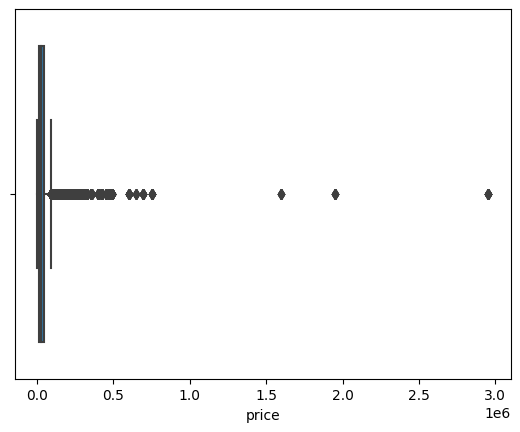

In [82]:
sns.boxplot(data=df, x="price")

IQR: 29500.0
range: -28,750.0 to 89,250.0
Non-outliers: 51176
Outliers: 3097
Percentage of Outliers: 5.7063
IQR: 26500.0
range: -24,750.0 to 81,250.0
Non-outliers: 50345
Outliers: 831
Percentage of Outliers: 1.5311
IQR: 25000.0
range: -22,500.0 to 77,500.0
Non-outliers: 49875
Outliers: 470
Percentage of Outliers: 0.8660
IQR: 24900.0
range: -22,350.0 to 77,250.0
Non-outliers: 49863
Outliers: 12
Percentage of Outliers: 0.0221
IQR: 24900.0
range: -22,350.0 to 77,250.0
Non-outliers: 49863
Outliers: 0
Percentage of Outliers: 0.0000


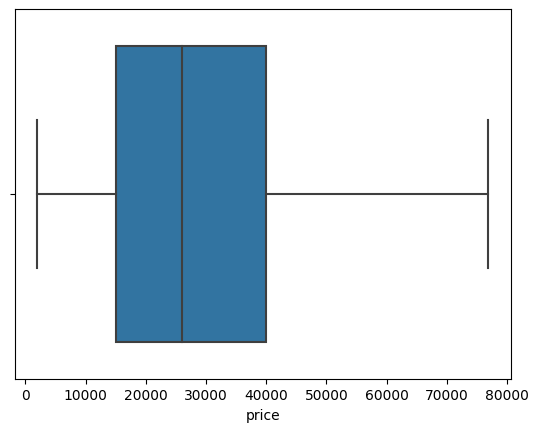

In [83]:
df = remove_outlier("price")

### Find outliers for milage feature

<Axes: xlabel='milage'>

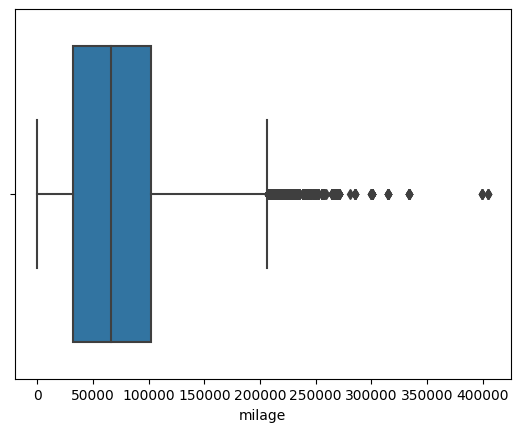

In [84]:
sns.boxplot(data=cleaned_df, x="milage")

IQR: 66700.0
range: -60,750.0 to 206,050.0
Non-outliers: 49148
Outliers: 715
Percentage of Outliers: 1.4339
IQR: 64814.0
range: -58,221.0 to 201,035.0
Non-outliers: 49048
Outliers: 100
Percentage of Outliers: 0.2005
IQR: 64400.0
range: -57,600.0 to 200,000.0
Non-outliers: 49012
Outliers: 36
Percentage of Outliers: 0.0722
IQR: 64272.0
range: -57,408.0 to 199,680.0
Non-outliers: 49012
Outliers: 0
Percentage of Outliers: 0.0000


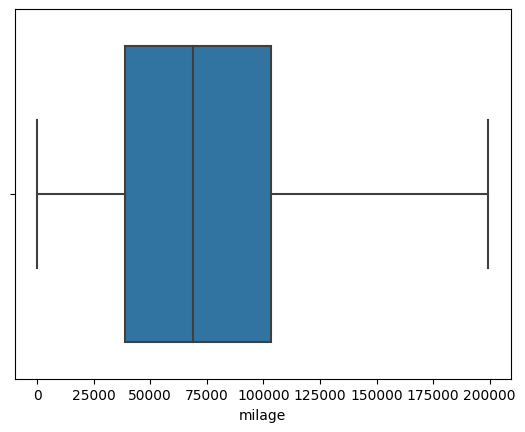

In [85]:
df = remove_outlier("milage")

In [86]:
# # Get IQR 
# Q1 = cleaned_df["milage"].quantile(0.25)
# Q3 = cleaned_df["milage"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [87]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound:,} to {upper_bound:,}")

In [88]:
# non_outliers = df[ (df["milage"] > lower_bound) & (df["milage"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [89]:
# df = non_outliers

In [90]:
# sns.boxplot(data=df, x="milage")

### Find outliers for model_year feature

<Axes: xlabel='model_year'>

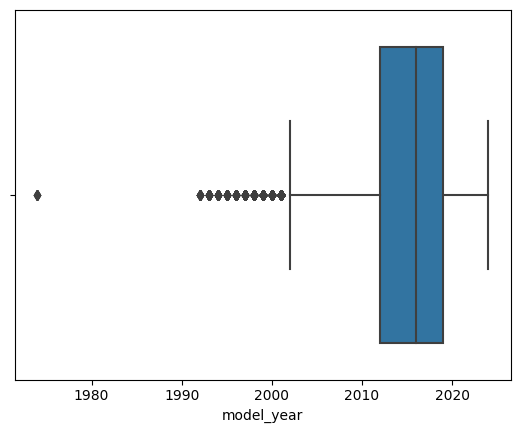

In [91]:
sns.boxplot(data=cleaned_df, x="model_year")

IQR: 7.0
range: 2,001.5 to 2,029.5
Non-outliers: 47952
Outliers: 1060
Percentage of Outliers: 2.1627
IQR: 7.0
range: 2,001.5 to 2,029.5
Non-outliers: 47952
Outliers: 0
Percentage of Outliers: 0.0000


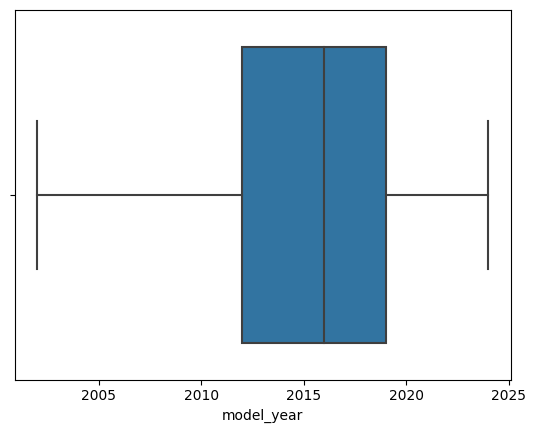

In [92]:
df = remove_outlier("model_year")

In [93]:
# # Get IQR 
# Q1 = cleaned_df["model_year"].quantile(0.25)
# Q3 = cleaned_df["model_year"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [94]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound} to {upper_bound}")

In [95]:
# non_outliers = df[ (df["model_year"] > lower_bound) & (df["model_year"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [96]:
# df = non_outliers

In [97]:
# sns.boxplot(data=df, x="model_year")

### Find outliers in horsepower feature

<Axes: xlabel='horsepower'>

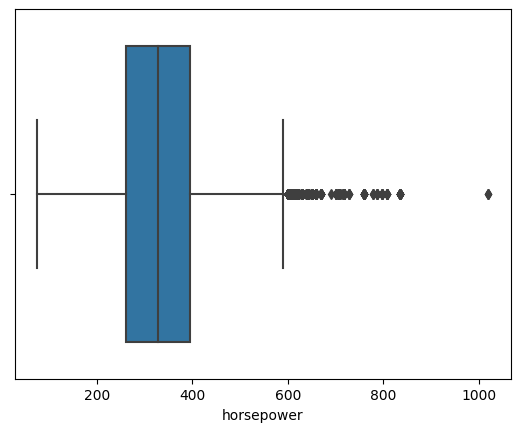

In [98]:
sns.boxplot(data=cleaned_df, x="horsepower")

IQR: 122.0
range: 77.0 to 565.0
Non-outliers: 47023
Outliers: 929
Percentage of Outliers: 1.9374
IQR: 120.0
range: 80.0 to 560.0
Non-outliers: 46554
Outliers: 469
Percentage of Outliers: 0.9781
IQR: 120.0
range: 75.0 to 555.0
Non-outliers: 46523
Outliers: 31
Percentage of Outliers: 0.0646
IQR: 120.0
range: 75.0 to 555.0
Non-outliers: 46523
Outliers: 0
Percentage of Outliers: 0.0000


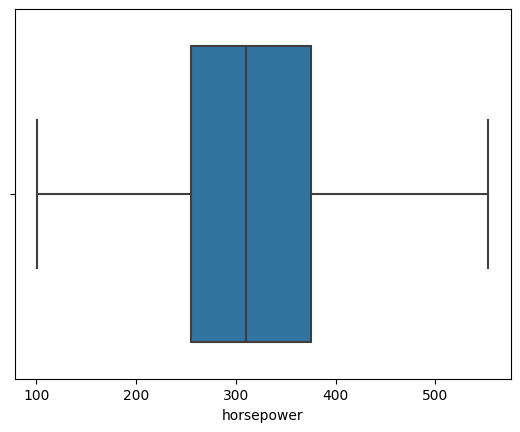

In [99]:
df = remove_outlier("horsepower")

In [100]:
# # Get IQR 
# Q1 = cleaned_df["horsepower"].quantile(0.25)
# Q3 = cleaned_df["horsepower"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [101]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound} to {upper_bound}")

In [102]:
# non_outliers = df[ (df["horsepower"] > lower_bound) & (df["horsepower"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [103]:
# df = non_outliers

In [104]:
# sns.boxplot(data=df, x="horsepower")

### Find outliers in displacement

<Axes: xlabel='displacement'>

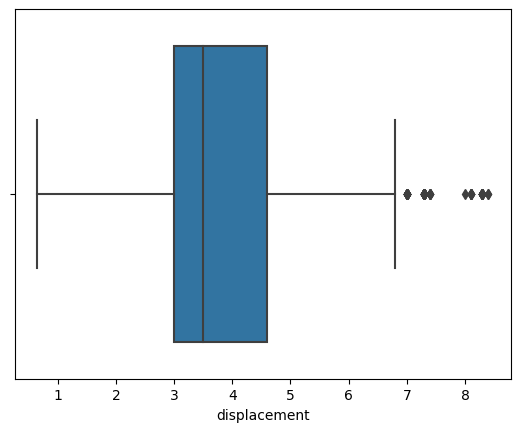

In [105]:
sns.boxplot(data=cleaned_df, x="displacement")

IQR: 1.7000000000000002
range: 0.1499999999999999 to 6.950000000000001
Non-outliers: 46431
Outliers: 92
Percentage of Outliers: 0.1978
IQR: 1.7000000000000002
range: 0.1499999999999999 to 6.950000000000001
Non-outliers: 46431
Outliers: 0
Percentage of Outliers: 0.0000


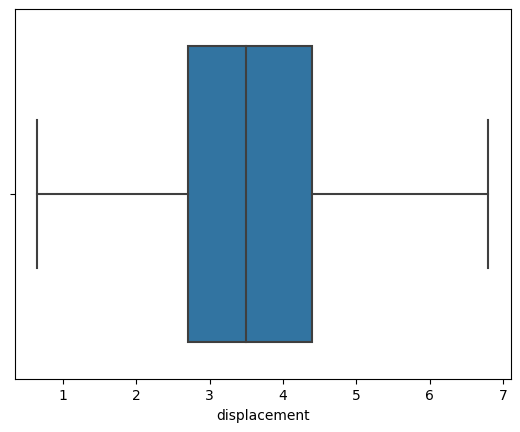

In [106]:
df = remove_outlier("displacement")

In [107]:
# # Get IQR 
# Q1 = cleaned_df["displacement"].quantile(0.25)
# Q3 = cleaned_df["displacement"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [108]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound:.2f} to {upper_bound:.2f}")

In [109]:
# non_outliers = df[ (df["displacement"] > lower_bound) & (df["displacement"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [110]:
# df = non_outliers

In [111]:
# sns.boxplot(data=df, x="displacement")

### Find outliers in displacement

In [112]:
# sns.boxplot(data=cleaned_df, x="num_cylinders")

In [113]:
# # Get IQR 
# Q1 = cleaned_df["num_cylinders"].quantile(0.25)
# Q3 = cleaned_df["num_cylinders"].quantile(0.75)
# IQR = Q3 - Q1
# IQR

In [114]:
# lower_bound = Q1 - 1.5 * IQR 
# upper_bound = Q3 + 1.5 * IQR 

# print(f"range: {lower_bound:.2f} to {upper_bound:.2f}")

In [115]:
# non_outliers = df[ (df["num_cylinders"] > lower_bound) & (df["num_cylinders"] < upper_bound) ]

# num_non_outliers = len(non_outliers)
# num_outliers = len(df) - num_non_outliers

# print(f"Non-outliers: {num_non_outliers}")
# print(f"Outliers: {num_outliers}")
# print(f"Percentage of Outliers: {(num_outliers / len(df) * 100):.4f}")

In [116]:
# df = non_outliers

In [117]:
# sns.boxplot(data=df, x="num_cylinders")

In [118]:
total_data = len(unedited_df)
total_outliers = len(unedited_df) - len(df)
data_without_outliers = total_data - total_outliers
removed_outlier_perc = (total_outliers / total_data) * 100

print(f"total data: {total_data:,}")
print(f"total outliers: {total_outliers:,}")
print(f"data without outliers: {data_without_outliers:,}")
print(f"percentage of outliers: {removed_outlier_perc:.2f}%")

total data: 54,273
total outliers: 7,842
data without outliers: 46,431
percentage of outliers: 14.45%


In [119]:
non_outlier_df = copy.deepcopy(df)

### Engineer new features by squaring numeric features with significant trend on car's price

In [120]:
numerical_features = [
    "model_year",
    "milage",
    "horsepower",
    "displacement",
    "num_cylinders"
]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

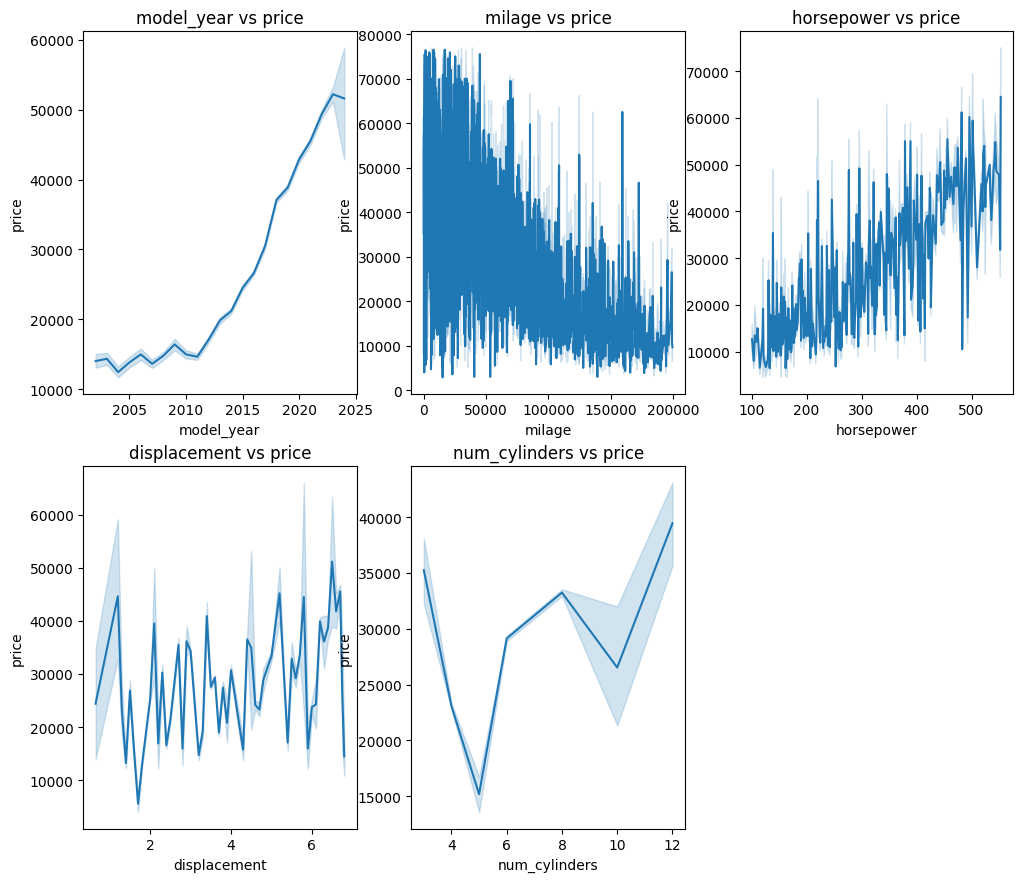

In [121]:
plt.figure(figsize=(12, 16))
for index, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, index)
#     sns.scatterplot(data=df, x=feature, y='price')
    sns.lineplot(data=df, x=feature, y='price')  

    plt.title(f"{feature} vs price")
plt.show()

In [122]:
from scipy.stats import boxcox

## Applying Boxcox on milage
def plot_boxcox_transfer(feature):
     # Remove extreme outliers by clipping
    original_mileage = df[feature]

    # Apply Box-Cox transformation
    transformed_mileage, lambda_value = boxcox(df[feature] + 1)  # Adding 1 to handle zero and negative values
    # Convert transformed array back to DataFrame series
    df[feature] = transformed_mileage
    
    transformed_mileage, lambda_value = boxcox(test_df[feature] + 1)  # Adding 1 to handle zero and negative values
    # Convert transformed array back to DataFrame series
    test_df[feature] = transformed_mileage

    # Create figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))


    sns.histplot(original_mileage, bins=20, kde=True, color='blue', ax=axes[0])
    axes[0].set_title(f'Original {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')


    sns.histplot(transformed_mileage, bins=20, kde=True, color='green', ax=axes[1])
    axes[1].set_title(f'Box-Cox Transformed {feature}')
    axes[1].set_xlabel(f'Box-Cox Transformed {feature}')
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

In [123]:
from sklearn.preprocessing import QuantileTransformer

def plot_quantile_transfer(feature):
# Applying Quantile transformation on model year

    # Original 'model_year' column
    original_model_year = df[feature]

    # Initialize QuantileTransformer
    qt = QuantileTransformer(output_distribution='normal', random_state=42)

    # Fit and transform the data
    transformed_model_year = qt.fit_transform(df[feature].values.reshape(-1, 1))
    # Convert transformed array back to DataFrame series
    df[feature] = transformed_model_year.flatten()
    
    transformed_model_year = qt.fit_transform(test_df[feature].values.reshape(-1, 1))
    test_df[feature] = transformed_model_year.flatten()


    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Plotting original model year
    sns.histplot(original_model_year, bins=20, kde=True, color='blue', ax=axes[0])
    axes[0].set_title(f'Original {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')

    # Plotting transformed feature
    sns.histplot(transformed_model_year, bins=20, kde=True, color='green', ax=axes[1])
    axes[1].set_title(f'Quantile Transformed {feature}')
    axes[1].set_xlabel(f'Quantile Transformed {feature}')
    axes[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


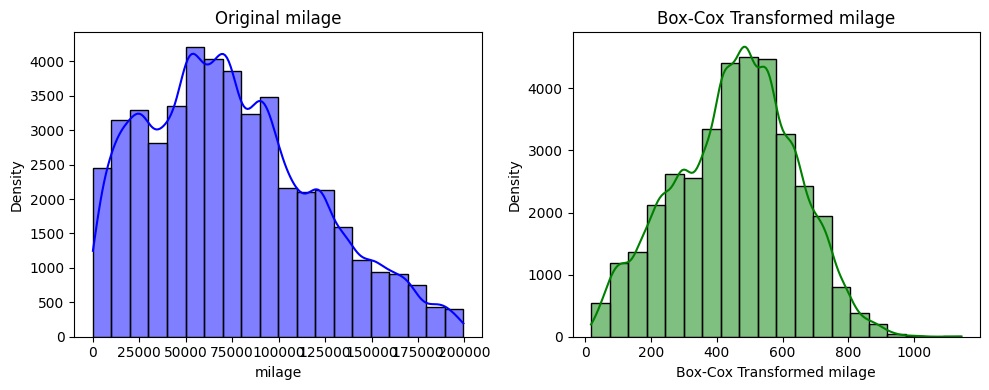

In [124]:
plot_boxcox_transfer("milage")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


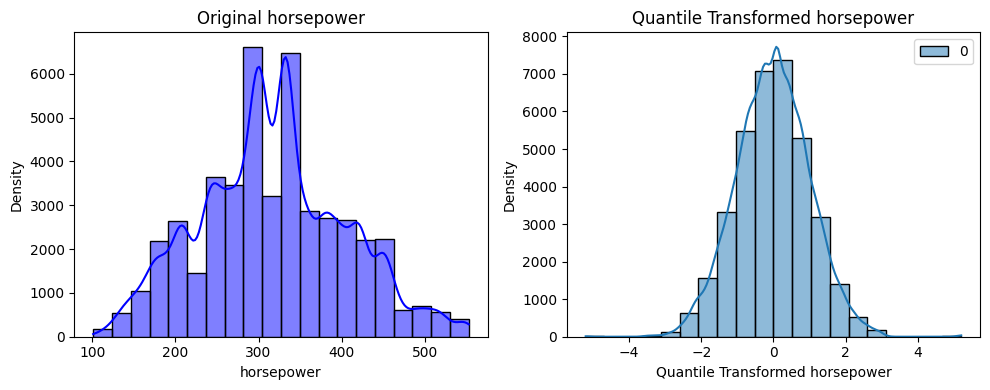

In [125]:
plot_quantile_transfer("horsepower")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


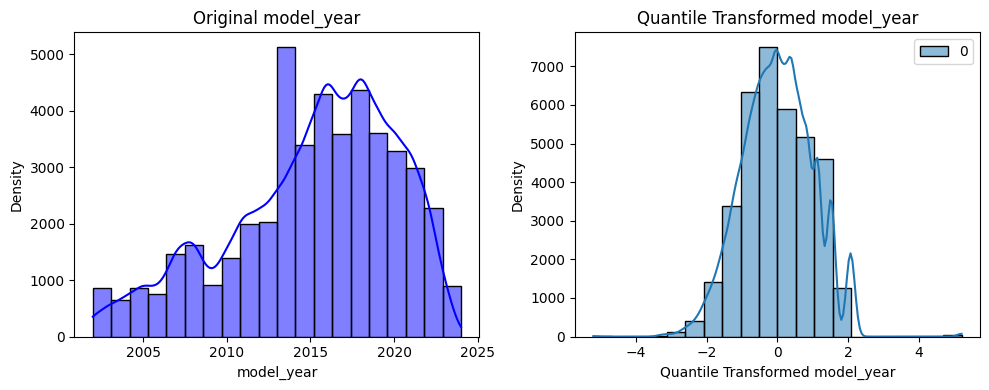

In [126]:
plot_quantile_transfer("model_year")

In [127]:
df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,displacement,num_cylinders,engine_shape
0,0,Ford,F-150,0.443149,1151.199387,Gasoline,A/T,Blue,Gray,0,11000,0.659602,3.5,6,V
1,1,BMW,335,-1.404533,1201.238103,Gasoline,M/T,Black,Black,0,8250,-0.230353,3.0,6,I
2,2,Jaguar,XF,-1.064091,1298.616842,Gasoline,A/T,Purple,Beige,0,15000,-0.230353,4.2,8,I
3,3,BMW,X7,1.710968,157.122523,Hybrid,A/T,Gray,Brown,0,63500,0.364191,3.0,6,I
5,5,Acura,Integra,-2.241016,1554.846952,Gasoline,M/T,Red,Beige,1,4995,-2.183092,1.8,4,I


In [128]:
# df = df.drop(["model_year", "milage", "horsepower"], axis=1)

In [129]:
df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,displacement,num_cylinders,engine_shape
0,0,Ford,F-150,0.443149,1151.199387,Gasoline,A/T,Blue,Gray,0,11000,0.659602,3.5,6,V
1,1,BMW,335,-1.404533,1201.238103,Gasoline,M/T,Black,Black,0,8250,-0.230353,3.0,6,I
2,2,Jaguar,XF,-1.064091,1298.616842,Gasoline,A/T,Purple,Beige,0,15000,-0.230353,4.2,8,I
3,3,BMW,X7,1.710968,157.122523,Hybrid,A/T,Gray,Brown,0,63500,0.364191,3.0,6,I
5,5,Acura,Integra,-2.241016,1554.846952,Gasoline,M/T,Red,Beige,1,4995,-2.183092,1.8,4,I


In [130]:
# df = df.rename(columns={
#     'milage_boxcox': 'milage',
#     'model_year_quantile': 'model_year',
#     'horsepower_quantile': 'horsepower'
# })

In [131]:
df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,displacement,num_cylinders,engine_shape
0,0,Ford,F-150,0.443149,1151.199387,Gasoline,A/T,Blue,Gray,0,11000,0.659602,3.5,6,V
1,1,BMW,335,-1.404533,1201.238103,Gasoline,M/T,Black,Black,0,8250,-0.230353,3.0,6,I
2,2,Jaguar,XF,-1.064091,1298.616842,Gasoline,A/T,Purple,Beige,0,15000,-0.230353,4.2,8,I
3,3,BMW,X7,1.710968,157.122523,Hybrid,A/T,Gray,Brown,0,63500,0.364191,3.0,6,I
5,5,Acura,Integra,-2.241016,1554.846952,Gasoline,M/T,Red,Beige,1,4995,-2.183092,1.8,4,I


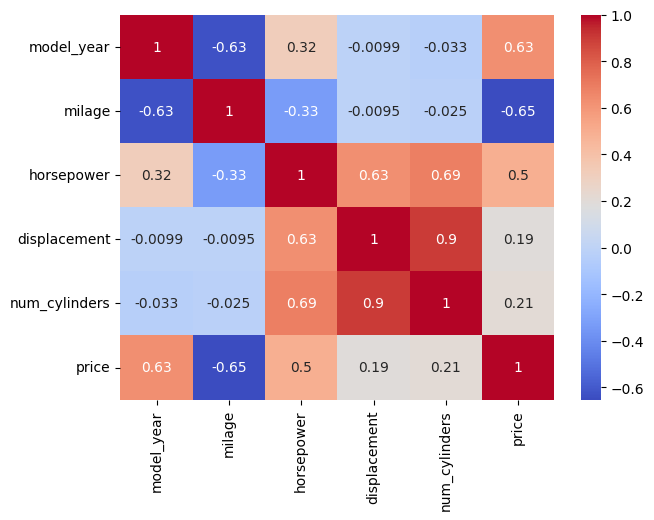

In [132]:
features_to_plot = [
    "model_year",
    "milage",
    "horsepower",
    "displacement",
    "num_cylinders",
    "price"
]

corrmat = df[features_to_plot].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7, 5))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr() ,annot=True, cmap="coolwarm")

In [133]:
# df = non_outlier_df

numerical_features_to_square = [
    "model_year",
    "milage",
    "horsepower",
#     "displacement", # not trend to price
#     "num_cylinders",  # not trend to price
]

# Engineer square root and log
for feature in numerical_features_to_square:
    
#     df[f"{feature}_root"] = df[feature] ** (1/2)
#     df[f"{feature}"] = np.log(df[feature] + 1)
    
#     test_df[f"{feature}_root"] = test_df[feature] ** (1/2)
#     test_df[f"{feature}"] = np.log(test_df[feature] + 1)
    ...


df.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,horsepower,displacement,num_cylinders,engine_shape
0,0,Ford,F-150,0.443149,1151.199387,Gasoline,A/T,Blue,Gray,0,11000,0.659602,3.5,6,V
1,1,BMW,335,-1.404533,1201.238103,Gasoline,M/T,Black,Black,0,8250,-0.230353,3.0,6,I
2,2,Jaguar,XF,-1.064091,1298.616842,Gasoline,A/T,Purple,Beige,0,15000,-0.230353,4.2,8,I
3,3,BMW,X7,1.710968,157.122523,Hybrid,A/T,Gray,Brown,0,63500,0.364191,3.0,6,I
5,5,Acura,Integra,-2.241016,1554.846952,Gasoline,M/T,Red,Beige,1,4995,-2.183092,1.8,4,I


In [134]:
# Ensure values are not too extremes (inf or 0)
df.describe()

,id,model_year,milage,accident,price,horsepower,displacement,num_cylinders
count,46431.000000,46431.000000,46431.000000,46431.000000,46431.000000,46431.000000,46431.000000,46431.000000
mean,27137.356680,-0.020570,1091.793279,0.282484,28856.560466,-0.000764,3.618003,6.109151
std,15663.621444,1.066341,430.737455,0.450212,17123.605844,1.005569,1.309019,1.488015
min,0.000000,-5.199338,23.339385,0.000000,2000.000000,-5.199338,0.650000,3.000000
25%,13591.500000,-0.676854,794.837335,0.000000,15000.000000,-0.676854,2.700000,6.000000
50%,27123.000000,0.001255,1109.284817,0.000000,26000.000000,-0.021329,3.500000,6.000000
75%,40681.500000,0.700711,1394.251741,1.000000,39500.000000,0.659602,4.400000,8.000000
max,54272.000000,5.199338,2041.365914,1.000000,76900.000000,5.199338,6.800000,12.000000


In [135]:
preprocessed_test_df = copy.deepcopy(test_df)
preprocessed_df =  copy.deepcopy(df)

## Model Development

### Separate Features and Labels

In [136]:
features_to_drop = [
    "id",
    "price", 
#     "displacement",
#     "num_cylinders",
#     "brand",
    "model",
    "ext_col",
    "int_col",
#     "engine_shape",
#     "transmission",
#     "fuel_type"
]


# Set features similar to the test set only without id column
features = preprocessed_df.drop(features_to_drop, axis=1, errors="ignore")
test_df = preprocessed_test_df.drop(features_to_drop, axis=1, errors="ignore")

features_price = preprocessed_df["id"]
test_df_ids = preprocessed_test_df["id"]

# Remove price column in features and save it in labels
labels = preprocessed_df["price"]

print(features.columns)
print(labels)

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission',
       'accident', 'horsepower', 'displacement', 'num_cylinders',
       'engine_shape'],
      dtype='object')
0        11000
1         8250
2        15000
3        63500
5         4995
         ...  
54267    32500
54268    29000
54269     6500
54270    18950
54272    37499
Name: price, Length: 46431, dtype: int64


### Encode categorical features (One Hot Encode)

In [137]:
numerical_features = features.select_dtypes(exclude='object')
categorical_features = features.select_dtypes(include='object')

numerical_test_df = test_df.select_dtypes(exclude='object')
categorical_test_df = test_df.select_dtypes(include='object')

In [138]:
for feature in categorical_features:
    all_categories = np.concatenate((categorical_features[feature].unique(), categorical_test_df[feature].unique()))
    all_categories = np.unique(all_categories)
    
    categorical_features[feature] = pd.Categorical(categorical_features[feature], categories=all_categories)
    categorical_test_df[feature] = pd.Categorical(categorical_test_df[feature], categories=all_categories)
    
    print(len(categorical_features[feature].unique()), len(categorical_test_df[feature].unique()))

len(categorical_features)

51 53
4 4
2 2
5 5


46431

In [139]:
# One Hot Encoder
# scaler = sklearn.preprocessing.OneHotEncoder()
# for feature in categorical_features:
#     scaled_values = scaler.fit_transform(categorical_features)
#     categorical_features[feature] = scaled_values
    

# categorical_features.tail()

In [140]:
# Target Encoder
# scaler = sklearn.preprocessing.TargetEncoder()
# for feature in categorical_features:
#     categorical_features[feature] = scaler.fit_transform(categorical_features[feature], features_price)
#     categorical_test_df[feature] = scaler.transform(categorical_test_df[feature])

In [141]:
# Cat Boost Encoder
scaler = category_encoders.cat_boost.CatBoostEncoder()
# for feature in categorical_features:
categorical_features = scaler.fit_transform(categorical_features, features_price)
categorical_test_df = scaler.transform(categorical_test_df)

In [142]:
# Label Encoder
# scaler = sklearn.preprocessing.LabelEncoder()

# for feature in categorical_features:
#     categorical_features[feature] = scaler.fit_transform(categorical_features[feature])
#     categorical_test_df[feature] = scaler.transform(categorical_test_df[feature])

In [143]:
categorical_features.tail()

,brand,fuel_type,transmission,engine_shape
54267,26819.772669,27508.931617,27131.080948,27109.836526
54268,27364.446582,27135.170004,27131.722019,27110.787207
54269,26686.113958,27336.120735,27132.363084,27111.737857
54270,26765.317358,27135.809010,27133.004143,27176.966500
54272,26696.471782,27525.459146,27133.645194,27112.688475


In [144]:
categorical_test_df.tail()

,brand,fuel_type,transmission,engine_shape
36178,27513.878994,27136.448033,27134.286263,27113.639132
36179,27067.553289,27136.448033,27134.286263,27113.639132
36180,26949.702732,27136.448033,27169.059111,27113.639132
36181,27667.181311,27136.448033,27134.286263,27178.576688
36182,27067.553289,27355.195012,27134.286263,27113.639132


In [145]:
# categorical_features = pd.get_dummies(categorical_features, dtype=int)
# categorical_features.tail()

In [146]:
# categorical_test_df = pd.get_dummies(categorical_test_df, dtype=int)
# categorical_test_df.tail()


In [147]:
categorical_features.columns

Index(['brand', 'fuel_type', 'transmission', 'engine_shape'], dtype='object')

In [148]:
features = categorical_features.join(numerical_features)
test_df = categorical_test_df.join(numerical_test_df)

features.tail()

,brand,fuel_type,transmission,engine_shape,model_year,milage,accident,horsepower,displacement,num_cylinders
54267,26819.772669,27508.931617,27131.080948,27109.836526,0.961429,1102.340649,0,0.848075,3.0,6
54268,27364.446582,27135.170004,27131.722019,27110.787207,0.214920,666.109652,0,1.371657,4.4,8
54269,26686.113958,27336.120735,27132.363084,27111.737857,-0.205941,1324.340422,1,-1.037937,2.0,4
54270,26765.317358,27135.809010,27133.004143,27176.966500,-0.530745,814.515903,1,1.111702,3.6,6
54272,26696.471782,27525.459146,27133.645194,27112.688475,1.275302,743.064882,0,-0.624145,2.0,4


### Scale numerical features

In [149]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaled_values = scaler.fit_transform(features)
features = pd.DataFrame(scaled_values, index=features.index ,columns=features.columns)

scaled_values = scaler.transform(test_df)
test_df = pd.DataFrame(scaled_values, index=test_df.index ,columns=test_df.columns)

In [150]:
features.tail()

,brand,fuel_type,transmission,engine_shape,model_year,milage,accident,horsepower,displacement,num_cylinders
54267,0.827365,0.999394,0.998834,0.995678,0.592457,0.534681,0.0,0.581556,0.382114,0.333333
54268,0.844651,0.985686,0.998858,0.995714,0.520668,0.318514,0.0,0.631907,0.609756,0.555556
54269,0.823123,0.993056,0.998882,0.995749,0.480195,0.644690,1.0,0.400186,0.219512,0.111111
54270,0.825636,0.985709,0.998905,0.998173,0.448960,0.392055,1.0,0.606908,0.479675,0.333333
54272,0.823451,1.000000,0.998929,0.995784,0.622641,0.356648,0.0,0.439978,0.219512,0.111111


In [151]:
test_df.tail()

,brand,fuel_type,transmission,engine_shape,model_year,milage,accident,horsepower,displacement,num_cylinders
36178,0.849394,0.985733,0.998953,0.995820,0.558853,0.049933,0.0,0.583474,0.902439,0.555556
36179,0.835228,0.985733,0.998953,0.995820,0.341399,0.374048,1.0,0.463685,0.756098,0.555556
36180,0.831488,0.985733,1.000246,0.995820,0.422853,0.294956,0.0,0.261180,0.186992,0.111111
36181,0.854259,0.985733,0.998953,0.998233,0.558853,0.167630,0.0,0.608717,0.463415,0.333333
36182,0.835228,0.993755,0.998953,0.995820,0.435213,0.350482,1.0,0.494930,0.756098,0.555556


### Merge the encoded categorical features and scaled numerical features 

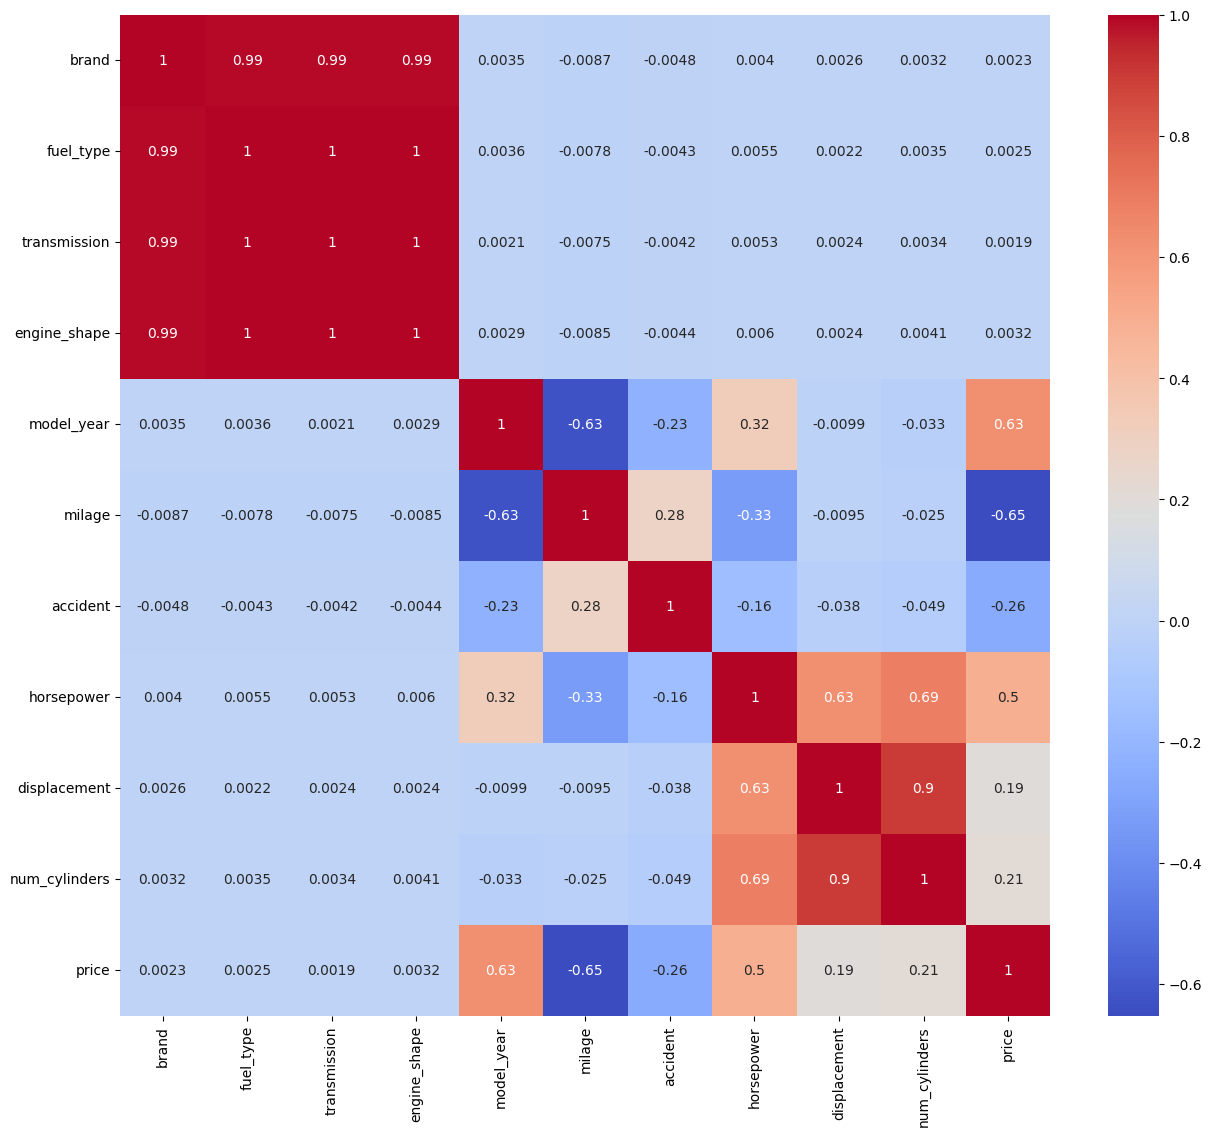

In [152]:
features_to_plot = features.copy()
features_to_plot["price"] = labels
corrmat = features_to_plot.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(15, 13))
#plot heat map
g=sns.heatmap(features_to_plot[top_corr_features].corr() ,annot=True, cmap="coolwarm")

### Split dataset (both features and labels) into train and test subsets

In [153]:
# Split the dataset into train (80%) and remain (20%) subsets
train_features, test_features, train_labels, test_labels = sklearn.model_selection.train_test_split(
    features, 
    labels,
    test_size=0.2,
    shuffle=True
)

In [154]:
# Check if indices of features and labels still match
print(train_features.head().index)
print(train_labels.head().index)

print(test_features.head().index)
print(test_labels.head().index)

Index([31786, 29833, 12278, 31620, 8852], dtype='int64')
Index([31786, 29833, 12278, 31620, 8852], dtype='int64')
Index([33082, 50095, 1444, 5747, 34227], dtype='int64')
Index([33082, 50095, 1444, 5747, 34227], dtype='int64')


In [155]:
# Check if dataset were split correctly
dataset_size = len(df)
print(f"80% of dataset: {dataset_size * 0.8:.2f} | train feature subset: {len(train_features)} | train label subset: {len(train_labels)}")
print(f"20% of dataset: {dataset_size * 0.2:.2f} | test feature subset: {len(test_features)} | test label subset: {len(test_labels)}")

# Check if total of the subsets the same as dataset_size
dataset_size, len(train_features) + len(test_features), len(train_labels) + len(test_labels)
print(f"100% of dataset: {dataset_size} | feature (train and test) subset: {len(train_features) + len(test_features)} | label (train and test) subset: {len(train_labels) + len(test_labels)}")


80% of dataset: 37144.80 | train feature subset: 37144 | train label subset: 37144
20% of dataset: 9286.20 | test feature subset: 9287 | test label subset: 9287
100% of dataset: 46431 | feature (train and test) subset: 46431 | label (train and test) subset: 46431


### Train the model

In [156]:
models = {
    "Linear": sklearn.linear_model.LinearRegression(),
    "Huber": sklearn.linear_model.HuberRegressor(max_iter=100_000),
    "AdaBoost": sklearn.ensemble.AdaBoostRegressor(), 
    "Gradient Boosting": sklearn.ensemble.GradientBoostingRegressor(),
    "Histogram Gradient Boosting": sklearn.ensemble.HistGradientBoostingRegressor(l2_regularization=1.0, learning_rate=0.1, max_bins=255, max_depth=5, max_iter=100, max_leaf_nodes=31, min_samples_leaf=50),
    "Random Forest": sklearn.ensemble.RandomForestRegressor(), 
    "Decision Tree": sklearn.tree.DecisionTreeRegressor(),
    "XG Boosting": xgb.XGBRegressor(colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, reg_alpha=0.1, reg_lambda=0, subsample=0.8),
    "SGD": sklearn.linear_model.SGDRegressor(),
    "Lasso": sklearn.linear_model.Lasso(),
    "Ridge": sklearn.linear_model.Ridge(),
    "LGBM": lgb.LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, feature_fraction=0.7, learning_rate=0.01, n_estimators=500, num_leaves=31, verbose=0),
    "Cat Boost": cb.CatBoostRegressor(bagging_temperature=0.5, depth=6, iterations=200, l2_leaf_reg=5, learning_rate=0.1, verbose=0),
}

In [157]:
def training(model_func, train_features, train_labels, test_features, test_labels):
    model = model_func
    fitted_model = model.fit(train_features, train_labels)
    prediction = model.predict(test_features)
    error = sklearn.metrics.mean_absolute_error(test_labels, prediction)
    return prediction, error, fitted_model
    

In [158]:
model_errors = {}
model_predictions = {}
model_r2_score = {}
models_fitted = {}


for name, model in models.items():
    prediction, error, fitted_model = training(
        model,
        train_features,
        train_labels,
        test_features,
        test_labels,
    )
    
    model_errors[name] = error
    model_predictions[name] = prediction
    model_r2_score[name] = sklearn.metrics.r2_score(test_labels, prediction)
    models_fitted[name] = fitted_model
    

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+11, tolerance: 1.093e+09
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

In [159]:
# names, errors = model_errors.items()
rows = list(model_errors.values()) + list(model_errors.values()) + list(model_r2_score.values())

rows = [{"name": list(models.keys())[i], "mae":list(model_errors.values())[i], "r2 score": list(model_r2_score.values())[i]} for i in range(len(models))]


result_df = pd.DataFrame(rows, columns=["name", "mae", "r2 score"])
result_df

,name,mae,r2 score
0,Linear,8193.391296,0.576522
1,Huber,8062.031958,0.569686
2,AdaBoost,11075.299292,0.397746
3,Gradient Boosting,7478.872427,0.628974
4,Histogram Gradient Boosting,7408.566088,0.633453
5,Random Forest,7681.273096,0.604630
6,Decision Tree,10362.202649,0.260074
7,XG Boosting,7391.288270,0.634925
8,SGD,8179.273674,0.577573
9,Lasso,8186.327338,0.577442


In [160]:
without_linear_df = result_df
without_linear_df

,name,mae,r2 score
0,Linear,8193.391296,0.576522
1,Huber,8062.031958,0.569686
2,AdaBoost,11075.299292,0.397746
3,Gradient Boosting,7478.872427,0.628974
4,Histogram Gradient Boosting,7408.566088,0.633453
5,Random Forest,7681.273096,0.604630
6,Decision Tree,10362.202649,0.260074
7,XG Boosting,7391.288270,0.634925
8,SGD,8179.273674,0.577573
9,Lasso,8186.327338,0.577442


<BarContainer object of 13 artists>

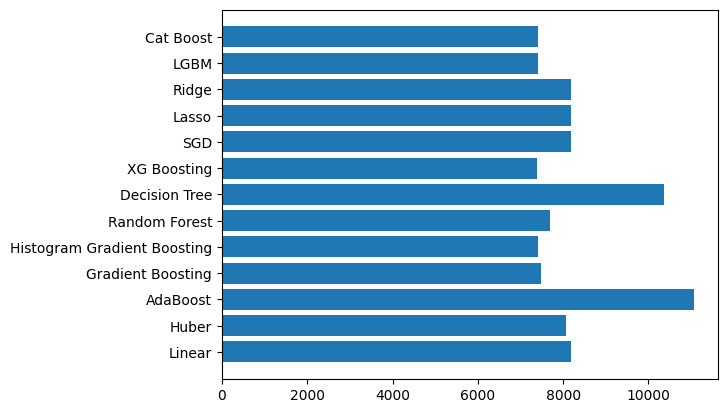

In [161]:
plt.barh(range(len(without_linear_df)), without_linear_df["mae"], tick_label=without_linear_df["name"])

In [162]:
min_error = result_df["mae"].min()
best = result_df[ result_df["mae"] == min_error ]
best_model = best["name"].values[0]
best

,name,mae,r2 score
7,XG Boosting,7391.28827,0.634925


In [163]:
predictions_dict = {
'Actual Value': test_labels,
 'Predicted Value': model_predictions[best_model], 
 "Difference": test_labels - model_predictions[best_model]
}

pred_df = pd.DataFrame(predictions_dict)
pred_df.head() 

,Actual Value,Predicted Value,Difference
33082,20000,13376.828125,6623.171875
50095,19500,19502.369141,-2.369141
1444,34000,42658.093750,-8658.093750
5747,18800,15829.407227,2970.592773
34227,17500,15775.497070,1724.502930


[0.008999   0.00971558 0.00947138 0.00994778 0.61568314 0.13029529
 0.02934185 0.08814737 0.02962417 0.06877443]


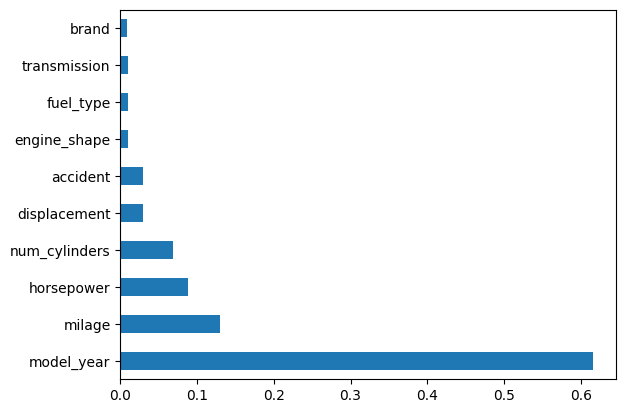

In [164]:
model = models_fitted["XG Boosting"]

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


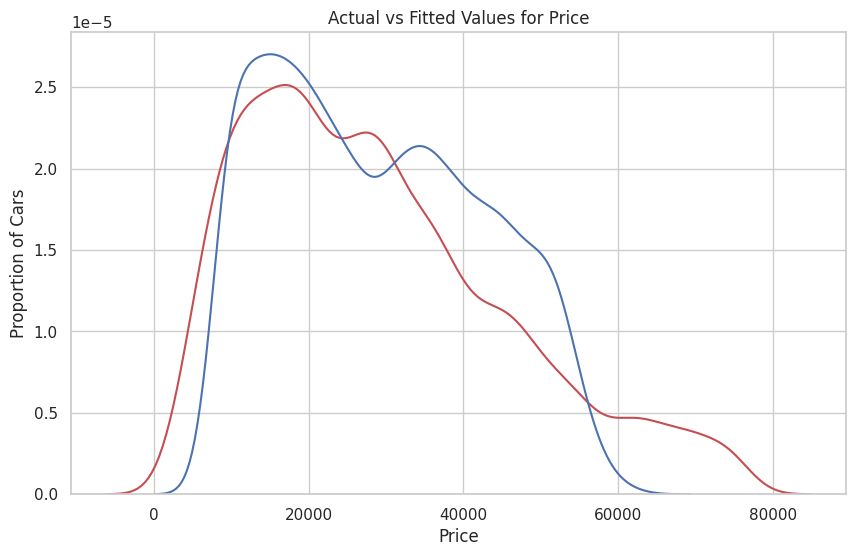

In [165]:
#distribution plot of y_test and yhat3

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(test_labels, color="r", label="Actual Value")
sns.kdeplot(model_predictions[best_model], color="b", label="Fitted Values")
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

In [166]:
# list(scipy.stats.loguniform(0.01, 1))

#### Find the best parameters

In [167]:
# from sklearn.model_selection import GridSearchCV

# model = cb.CatBoostRegressor(verbose=1)
# parameters = {
#     'iterations': [100, 200],
#     'depth': [4, 6],
#     'learning_rate': [0.05, 0.1],
#     'l2_leaf_reg': [3, 5],
#     'bagging_temperature': [0.5, 1.0],
#              }

# model = sklearn.ensemble.HistGradientBoostingRegressor()
# parameters = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_iter': [100, 200, 300],
#     'max_depth': [None, 3, 5, 7],
#     'min_samples_leaf': [20, 50, 100],
#     'max_leaf_nodes': [31, 63, 127],
#     'l2_regularization': [0.0, 0.1, 1.0],
#     'max_bins': [255, 511]
# }


# model = lgb.LGBMRegressor()
# parameters = {
#     'n_estimators': [100, 200, 500],
#     'num_leaves': [31, 62, 127],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'feature_fraction': [0.7, 0.9],
#     'bagging_fraction': [0.7, 0.9],
#     'bagging_freq': [1, 3],
# }

# model = xgb.XGBRegressor()
# parameters = {
#     'n_estimators': [200, 500],
#     'max_depth': [5, 7, 9],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8],
#     'gamma': [0],
#     'min_child_weight': [3],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [0, 0.1],
# }

# grid = sklearn.model_selection.GridSearchCV(estimator=model, param_grid = parameters, cv=2, n_jobs=-1)
# grid.fit(train_features, train_labels)

# print("\n The best score across ALL searched params:\n",grid.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid.best_params_)


## Predict the test data

In [168]:
model_to_use = models_fitted[best_model]
model_to_use

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [169]:
# Ensure model is fitted
lr = model_to_use
try:
    sklearn.utils.validation.check_is_fitted(lr)
    print(f"Model is fitted.") 
except sklearn.exceptions.NotFittedError as exc:
    print(f"Model is NOT fitted yet.") 


Model is fitted.


In [170]:
test_df

,brand,fuel_type,transmission,engine_shape,model_year,milage,accident,horsepower,displacement,num_cylinders
0,0.838726,0.985733,0.998953,0.998233,0.461734,0.232481,0.0,0.480565,0.463415,0.333333
1,0.842593,0.985733,0.998953,0.998233,0.477476,0.310204,0.0,0.445453,0.463415,0.333333
2,0.838726,0.985733,0.998953,0.995820,0.477476,0.194897,0.0,0.416702,0.219512,0.111111
3,0.827879,0.985733,0.998953,0.995820,0.537354,0.144576,1.0,0.648666,0.707317,0.555556
4,0.844795,0.985733,0.998953,0.995820,0.581383,0.258973,1.0,0.524264,0.382114,0.333333
...,...,...,...,...,...,...,...,...,...,...
36178,0.849394,0.985733,0.998953,0.995820,0.558853,0.049933,0.0,0.583474,0.902439,0.555556
36179,0.835228,0.985733,0.998953,0.995820,0.341399,0.374048,1.0,0.463685,0.756098,0.555556
36180,0.831488,0.985733,1.000246,0.995820,0.422853,0.294956,0.0,0.261180,0.186992,0.111111
36181,0.854259,0.985733,0.998953,0.998233,0.558853,0.167630,0.0,0.608717,0.463415,0.333333


In [171]:
test_df["price"] = model_to_use.predict(test_df)

In [172]:
test_df.head()

,brand,fuel_type,transmission,engine_shape,model_year,milage,accident,horsepower,displacement,num_cylinders,price
0,0.838726,0.985733,0.998953,0.998233,0.461734,0.232481,0.0,0.480565,0.463415,0.333333,26397.578125
1,0.842593,0.985733,0.998953,0.998233,0.477476,0.310204,0.0,0.445453,0.463415,0.333333,26414.142578
2,0.838726,0.985733,0.998953,0.995820,0.477476,0.194897,0.0,0.416702,0.219512,0.111111,23225.322266
3,0.827879,0.985733,0.998953,0.995820,0.537354,0.144576,1.0,0.648666,0.707317,0.555556,37414.839844
4,0.844795,0.985733,0.998953,0.995820,0.581383,0.258973,1.0,0.524264,0.382114,0.333333,41412.218750


In [173]:
test_df["id"] = test_df_ids
result = test_df[["id", "price"]]
result.head()

,id,price
0,54273,26397.578125
1,54274,26414.142578
2,54275,23225.322266
3,54276,37414.839844
4,54277,41412.218750


In [174]:
import datetime
import time

curr_datetime = time.strftime('%Y-%m-%d_%H:%M')
best_r2_score = result_df["r2 score"].max() * 100
filename = f"{curr_datetime}_{best_r2_score:.2f}perc.csv"
result.to_csv(filename, index=False)
filename

'2024-06-22_21:13_63.53perc.csv'